In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1

X, y = make_friedman1(n_samples=500, n_features=15, noise=0.3, random_state=23)
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.25)

In [3]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor

estimators = {
    'krr': KernelRidge(kernel='rbf', gamma=.25),
    'svr': SVR(gamma=.5),
    "dtr": DecisionTreeRegressor(max_depth=3),
    "knn": KNeighborsRegressor(n_neighbors=4),
    "gpr": GaussianProcessRegressor(alpha=1e-1),
    "mlp": MLPRegressor(alpha=25, max_iter=10_000)
} 

for name, estimator in estimators.items():
    print("Training {0}".format(name))
    estimator = estimator.fit(Xtrn, ytrn)

Training krr
Training svr
Training dtr
Training knn
Training gpr
Training mlp


In [4]:
import numpy as np

n_estimators, n_samples = len(estimators), Xtst.shape[0]

y_individual = np.zeros((n_samples, n_estimators))
for i, (model, estimator) in enumerate(estimators.items()):
    y_individual[:, i] = estimator.predict(Xtst)
y_final = np.mean(y_individual, axis=1)

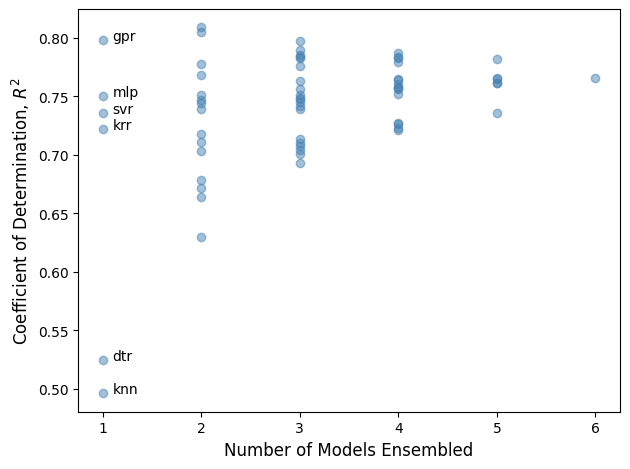

In [21]:
from itertools import combinations
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

models = list(estimators.keys())
combo_mean = np.zeros((len(estimators), ))
combo_std = np.zeros((len(estimators), ))

fig = plt.figure()

for n_ensemble in range(len(estimators)):
    combos = combinations(estimators, n_ensemble + 1)
    averaged_predictions = [np.mean(np.array([y_individual[:, models.index(e)] for e in list(c)]), axis=0) for c in combos]
    averaged_r2 = [r2_score(ytst, ypred) for ypred in averaged_predictions]
    
    n_combos = len(averaged_r2)
    
    plt.scatter(np.full((n_combos, ), n_ensemble + 1), averaged_r2, color='steelblue', alpha=.5)
    combo_mean[n_ensemble] = np.mean(averaged_r2)
    combo_std[n_ensemble] = np.std(averaged_r2)
    
    if n_ensemble == 0:
        for r, name in zip(averaged_r2, estimators):
            plt.text(1.1, r, name)

plt.xlabel("Number of Models Ensembled", fontsize=12)
plt.ylabel("Coefficient of Determination, $R^2$", fontsize=12)
fig.tight_layout()

Text(0, 0.5, 'Coefficient of Determination, $R^2$')

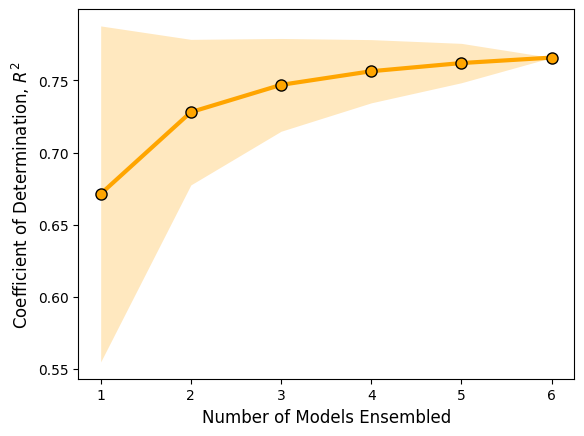

In [26]:
fig = plt.figure()
plt.fill_between(np.arange(1, len(estimators) + 1), combo_mean - combo_std, combo_mean + combo_std,
                 alpha=.25, linewidth=0, color='orange')
plt.plot(np.arange(1, len(estimators) + 1), combo_mean, marker='o', color='orange', markersize=8, markeredgecolor='k',
         linewidth=3)
plt.xlabel("Number of Models Ensembled", fontsize=12)
plt.ylabel("Coefficient of Determination, $R^2$", fontsize=12)